### Convolutional Neural Network


![CNN Architecture](https://github.com/sarvkk/CodeThePaper/blob/main/CNN/CNN-arch.png?raw=1)

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils import data
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

/root/miniforge3/envs/LLMs/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize for 3 color channels
])

In [5]:
transform= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize for 3 color channels
                               ])
#train_set
training= torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
trainingload= torch.utils.data.DataLoader(training,batch_size=4,shuffle=True,num_workers=2)
#test_set
test=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
testload= torch.utils.data.DataLoader(test,batch_size=4,shuffle=False,num_workers=2)

classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

100%|██████████| 170498071/170498071 [00:26<00:00, 6456189.86it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
class model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool= nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear(16*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [7]:
cn1model=model()

In [8]:
lossfn = nn.CrossEntropyLoss()
optimizer= optim.Adam(cn1model.parameters(),lr=0.001)

In [10]:
for epoch in range(2):  # You might need more epochs
    total_loss = 0.0
    for i, data in enumerate(trainingload, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = cn1model(inputs)
        loss = lossfn(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        if (i + 1) % 1000 == 0:  # Print every 1000 batches
            print(f'Epoch No: {epoch + 1} | Batch No: {i + 1} | Loss: {total_loss / 1000:.4f}')
            total_loss = 0.0


Epoch No: 1 | Batch No: 1000 | Loss: 1.3877
Epoch No: 1 | Batch No: 2000 | Loss: 1.3810
Epoch No: 1 | Batch No: 3000 | Loss: 1.3862
Epoch No: 1 | Batch No: 4000 | Loss: 1.3578
Epoch No: 1 | Batch No: 5000 | Loss: 1.3574
Epoch No: 1 | Batch No: 6000 | Loss: 1.3563
Epoch No: 1 | Batch No: 7000 | Loss: 1.3076
Epoch No: 1 | Batch No: 8000 | Loss: 1.3334
Epoch No: 1 | Batch No: 9000 | Loss: 1.3243
Epoch No: 1 | Batch No: 10000 | Loss: 1.3162
Epoch No: 1 | Batch No: 11000 | Loss: 1.3082
Epoch No: 1 | Batch No: 12000 | Loss: 1.2747
Epoch No: 2 | Batch No: 1000 | Loss: 1.2082
Epoch No: 2 | Batch No: 2000 | Loss: 1.2269
Epoch No: 2 | Batch No: 3000 | Loss: 1.2415
Epoch No: 2 | Batch No: 4000 | Loss: 1.2352
Epoch No: 2 | Batch No: 5000 | Loss: 1.2202
Epoch No: 2 | Batch No: 6000 | Loss: 1.2006
Epoch No: 2 | Batch No: 7000 | Loss: 1.2258
Epoch No: 2 | Batch No: 8000 | Loss: 1.2345
Epoch No: 2 | Batch No: 9000 | Loss: 1.2356
Epoch No: 2 | Batch No: 10000 | Loss: 1.2150
Epoch No: 2 | Batch No: 1100

In [11]:
# Save the model's state dictionary:
PATH = './cifar_net.pth'
torch.save(cn1model.state_dict(), PATH)

In [12]:
# Load the model:
cn1model = model() # Re-initialize the model architecture
cn1model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [13]:
# Prediction on new data:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testload:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = cn1model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 57 %


In [14]:
# Evaluate performance metrics beyond accuracy:
from sklearn.metrics import classification_report

y_true = []
y_pred = []

with torch.no_grad():
    for data in testload:
        images, labels = data
        outputs = cn1model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

print(classification_report(y_true, y_pred, target_names=classes))


              precision    recall  f1-score   support

       plane       0.57      0.65      0.61      1000
         car       0.64      0.71      0.67      1000
        bird       0.46      0.40      0.43      1000
         cat       0.40      0.33      0.36      1000
        deer       0.55      0.45      0.50      1000
         dog       0.52      0.42      0.47      1000
        frog       0.64      0.70      0.67      1000
       horse       0.55      0.71      0.62      1000
        ship       0.68      0.69      0.69      1000
       truck       0.62      0.64      0.63      1000

    accuracy                           0.57     10000
   macro avg       0.56      0.57      0.56     10000
weighted avg       0.56      0.57      0.56     10000



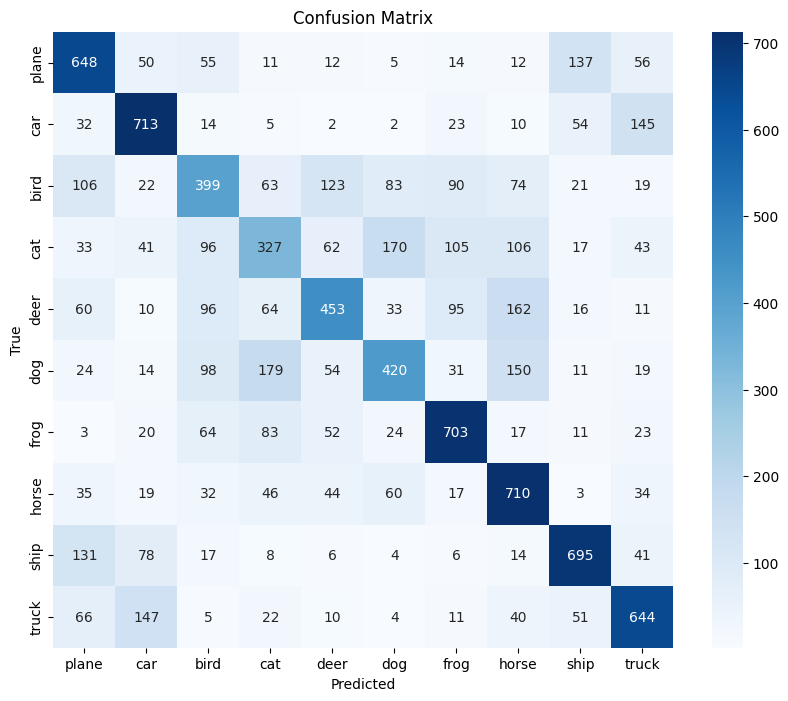

In [15]:
# Generate a confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

